# Advanced random IR
Week2: 13.03-19.03  
Stage: model Zero - a simple model  
This is a tool to generate random integration regions on genome of choice
#### Authors: 
Elvira Mingazova, Saira Afzal, Raffaele Fronza 2017

## Week 2 plan:
1. Generalization of the genome dimension file
2. Checking the input file
3. Testing the script with three different genomes: human, mouse and honey bee
4. Finding out the differences between:
    + hg 38 and hg19  
    + hg 38 versions 
5. Plotting and describing the empirical distribution function on chr1 with a sufficient number of samples

### 1. Generalize genome dimension file  
In the previous notebook file getRegionW1.ipynb the lenghts of the chromosomes were **hard coded**. Here we will change it by adding a new input argument -i. We will provide python with a text file where the chromosome names are in the first column and their lenghts in bp - in the second. Two columns are separated by tab or space.  
Below is an example of the text file that should be provided.

In [92]:
#To use bash commands inside of the notebook put "!" before
!cat ../scripts/hg38.txt| head -n5

chr1	224999719
chr2	237712649
chr3	194704827
chr4	187297063
chr5	177702766


Now we can modify the script in a way that it processes the text file and generates random integration regions on randomly chosen chromosomes.

In [1]:
#Create an empty dictionary to fill in the contents of each line in the .txt file as key:value pairs
dimension_dict = {}
with open('/Users/elming/Advanced-random-IR/data/hg38.txt') as dimension_file:
    for line in dimension_file:
        key, value = line.split()
        #fill the dictionary and make sure the length is of a type int
        dimension_dict[key.strip()]=int(value.strip())
    print dimension_dict
    dimension_file.close()

{'chr13': 114364328, 'chr12': 133275309, 'chr11': 135086622, 'chr10': 133797422, 'chr17': 83257441, 'chr16': 90338345, 'chr15': 101991189, 'chr14': 107043718, 'chr19': 58617616, 'chr18': 80373285, 'chr24': 57227415, 'chr22': 50818468, 'chr23': 156040895, 'chr20': 64444167, 'chr21': 46709983, 'chr7': 159345973, 'chr6': 170805979, 'chr5': 181538259, 'chr4': 190214555, 'chr3': 198295559, 'chr2': 242193529, 'chr1': 248956422, 'chr9': 138394717, 'chr8': 145138636}


Now we are ready to generate the integration regions

In [94]:
import random
#choose random chromosome
chrom = random.choice(dimension_dict.keys())
print chrom

chr11


In [95]:
#select a site on that chromosome
start = random.randint(1,dimension_dict[chrom])
print start

27837706


Now let's combine the code parts from getRegionW1.py and this notebook and write it into a getRegionW2.py

In [1]:
%%writefile ../scripts/getRegionW2.py
#parser setup
import sys
import argparse
parser = argparse.ArgumentParser()
parser.prog = 'progName.py'
parser.description = 'You can provide the program with three parameters through the terminal'
parser.add_argument("-n", type=int, help='Number of integration regions generated')
parser.add_argument("-r", type=int, help='Range-value: defines an interval where the IR is located')
parser.add_argument("-d", type=int, help='Delta-value: expands the range with the value provided by user')
#add new input argument
parser.add_argument("-i", help='Input-file .txt with names of chromosomes and their lengths in bp organized into two columns and separated by \t')
namespace = parser.parse_args((sys.argv[1:]))
dimension_dict = {}
with open(namespace.i) as dimension_file:
    for line in dimension_file:
        key, value = line.split("\t")
        dimension_dict[key.strip()]=int(value.strip())
    dimension_file.close()
#loop on n random IR
import random
count = 1
print "chr#", '\t', 'Start', '\t\t', 'End', '\t\trnd#'
for i in range(namespace.n):
    #select a chromosome
    chrom = random.choice(dimension_dict.keys())

    #select a site on that chromosome
    start = random.randint(1,dimension_dict[chrom])

    #select a random region
    end = start + random.randint(0,namespace.r) + namespace.d
    if len(str(chrom))==1:
        print chrom,'',"\t",start,"\t",end,"\trnd{}".format(count)
    else:
        print chrom,"\t",start,"\t",end,"\trnd{}".format(count)
    count +=1


Overwriting ../scripts/getRegionW2.py


We can run the script with a new input file provided in the command line. You can change any of the parameters

In [2]:
!python2 ../scripts/getRegionW2.py -n5 -r0 -d1 -i "../data/hg38.txt"

chr# 	Start 		End 		rnd#
chr1 	211993681 	211993682 	rnd1
chr17 	81780516 	81780517 	rnd2
chr8 	120245114 	120245115 	rnd3
chr18 	10933204 	10933205 	rnd4
chr21 	44794831 	44794832 	rnd5


### 2. Check the script  
In this part we want to add some testing options to the script to be able to check the input file. It has to fulfill the following coditions:
- the file is well formatted (2 columns)
- the first column contains a string "chrXY" where X and Y are digits
- the second column contains an integer
- the integer is not negative  

To test the file we could define "checking" functions

In [3]:
#a function that proves whether the input file contains  two columns
def checkFormatting():
    check=True
    with open('../data/hg38.txt') as dimension_file:
        #go through all of the lines and check whether exactly two columns are present
        for line in dimension_file:
            result=line.split()
            if len(result)==2:
                continue
            else:
                print 'Checking the format: the file has to contain two columns'
                check=False
                break
    dimension_file.close()
    if check == True:
        print "Checking the format: the file is well formatted"
        
checkFormatting()


Checking the format: the file is well formatted


In [4]:
#a function that proves whether the first column contains a string and that each string is unique.
def checkColumn1():
    check = True
    with open('../data/hg38wrong2.txt') as dimension_file:
        column1=[]
        lines=dimension_file.readlines()
        for line in lines:
            if line.split()[0].strip() not in column1:
                column1.append(line.split()[0].strip())
            else:
                print "Checking the first column: one of the chromosome names is duplicated"
                check = False
                break
        if check == True:
            print "Checking the first column: the names of chromosomes are correct"
    dimension_file.close()
    
checkColumn1()

Checking the first column: one of the chromosome names is duplicated


In the file hg38wrong2.txt one of the chromosome names in the first column was duplicated, so the helping message appeared.

In [5]:
#a function that proves whether the second column contains a positive integer
def checkColumn2():
    check = True
    with open('../data/hg38wrong3.txt') as dimension_file:
        column2=[]
        lines=dimension_file.readlines()
        for line in lines:
            try:
                #extract the second column to a list and try to convert each element into an integer
                column2.append(int(line.split()[1].strip()))
            #catch a ValueError: invalid literal for int()
            except ValueError:
                check = False
                print "Checking the second column: could not convert {} to an integer".format(line.split()[1].strip())
    dimension_file.close()
    if check == True:
        for length in column2:
            if length<0:
                print "Checking the second column: you provided a negative chromosome length: {}".format(length)
                check = False
    if check == True:
        return "Checking the second column: the lengths of chromosomes are correct"

checkColumn2()

Checking the second column: could not convert 81341915i to an integer


Now we can add the testing functions to the original script and test if it works

In [27]:
%%writefile ../scripts/getRegionW2.py
#parser setup
def parseArgs():
    import sys
    import argparse
    parser = argparse.ArgumentParser()
    parser.prog = 'progName.py'
    parser.description = 'You can provide the program with three parameters through the terminal'
    parser.add_argument("-n", type=int, help='Number of integration regions generated')
    parser.add_argument("-r", type=int, help='Range-value: defines an interval where the IR is located')
    parser.add_argument("-d", type=int, help='Delta-value: expands the range with the value provided by user')
    #add new input argument
    parser.add_argument("-i", help='Input-file .txt with names of chromosomes and their lengths in bp organized into two columns and separated by \t')
    namespace = parser.parse_args((sys.argv[1:]))
    return namespace
#a function that proves whether the input file contains  two columns
def checkFormatting():
    check=True
    #go through all of the lines and check whether exactly two columns are present
    for line in dimension_file:
        result=line.split()
        if len(result)==2:
            continue
        else:
            print 'Checking format: the text file has to contain two columns'
            check=False
            break
    if check == True:
        print "Checking format: the file is well formatted"
    return check

#a function that proves whether the first column contains a string "chrXY" where X and Y are digits
def checkColumn1():
    check = True
    column1=[]
    for line in dimension_file:
        if line.split()[0].strip() not in column1:
            column1.append(line.split()[0].strip())
        else:
            print "Checking the first column: one of the chromosome names is duplicated"
            check = False
            break
    if check == True:
        print "Checking the first column: the names of chromosomes are correct"
    return check
    
#a function that proves whether the second column contains a positive integer
def checkColumn2():
    check = True
    column2=[]
    for line in dimension_file:
        try:
            #extract the second column to a list and try to convert each element into an integer
            column2.append(int(line.split()[1].strip()))
        #catch a ValueError: invalid literal for int()
        except ValueError:
            check = False
            print "Checking the second column: could not convert {} to an integer".format(line.split()[1].strip())
    if check == True:
        for length in column2:
            if length<0:
                print "Checking the second column: you provided a negative chromosome length: {}".format(length)
                check = False
    if check == True:
        print "Checking the second column: the lengths of chromosomes are correct"
    return check
#a function which will process the given text file and return {"chr name": chr length} pairs inside of a dictionary
def getDimensionDict(filename):
    d={}
    with open(filename) as dimension_file:
        for line in dimension_file:
            key, value = line.split()
            d[key.strip()]=int(value.strip())
        dimension_file.close()
    return d
#the following line will protect the code frome executing if I will import the file as a module
if __name__ == "__main__":
    #check the input file
    namespace = parseArgs()
    f = open(namespace.i,"r")
    dimension_file=f.readlines()
    check=checkFormatting()
    if check==True:
        check=checkColumn1()
        if check==True:
            check=checkColumn2()
            if check == True:
                dimension_dict = getDimensionDict(namespace.i)
                #loop on n random IR
                import random
                count = 1
                print "chr#", '\t', 'Start', '\t\t', 'End', '\t\trnd#'
                for i in range(namespace.n):
                    #select a chromosome
                    chrom = random.choice(dimension_dict.keys())
    
                    #select a site on that chromosome
                    start = random.randint(1,dimension_dict[chrom])

                    #select a random region
                    end = start + random.randint(0,namespace.r) + namespace.d
                    if len(str(chrom))==1:
                        print chrom,'',"\t",start,"\t",end,"\trnd{}".format(count)
                    else:
                        print chrom,"\t",start,"\t",end,"\trnd{}".format(count)
                    count +=1
    f.close()

Overwriting ../scripts/getRegionW2.py


### Weighted chromosomes choice

In [ ]:
%%writefile ../scripts/getRegionW2_weighted.py
from __future__ import division
#parser setup
def parseArgs():
    import sys
    import argparse
    parser = argparse.ArgumentParser()
    parser.prog = 'progName.py'
    parser.description = 'You can provide the program with three parameters through the terminal'
    parser.add_argument("-n", type=int, help='Number of integration regions generated')
    parser.add_argument("-r", type=int, help='Range-value: defines an interval where the IR is located')
    parser.add_argument("-d", type=int, help='Delta-value: expands the range with the value provided by user')
    #add new input argument
    parser.add_argument("-i", help='Input-file .txt with names of chromosomes and their lengths in bp organized into two columns and separated by \t')
    namespace = parser.parse_args((sys.argv[1:]))
    return namespace
#a function that proves whether the input file contains  two columns
def checkFormatting():
    check=True
    #go through all of the lines and check whether exactly two columns are present
    for line in dimension_file:
        result=line.split()
        if len(result)==2:
            continue
        else:
            print 'Checking format: the text file has to contain two columns'
            check=False
            break
    if check == True:
        print "Checking format: the file is well formatted"
    return check

#a function that proves whether the first column contains a string "chrXY" where X and Y are digits
def checkColumn1():
    check = True
    column1=[]
    for line in dimension_file:
        if line.split()[0].strip() not in column1:
            column1.append(line.split()[0].strip())
        else:
            print "Checking the first column: one of the chromosome names is duplicated"
            check = False
            break
    if check == True:
        print "Checking the first column: the names of chromosomes are correct"
    return check
    
#a function that proves whether the second column contains a positive integer
def checkColumn2():
    check = True
    column2=[]
    for line in dimension_file:
        try:
            #extract the second column to a list and try to convert each element into an integer
            column2.append(int(line.split()[1].strip()))
        #catch a ValueError: invalid literal for int()
        except ValueError:
            check = False
            print "Checking the second column: could not convert {} to an integer".format(line.split()[1].strip())
    if check == True:
        for length in column2:
            if length<0:
                print "Checking the second column: you provided a negative chromosome length: {}".format(length)
                check = False
    if check == True:
        print "Checking the second column: the lengths of chromosomes are correct"
    return check
#a function which will process the given text file and return {"chr name": chr length} pairs inside of a dictionary
def getDimensionDict(filename):
    d={}
    with open(filename) as dimension_file:
        for line in dimension_file:
            key, value = line.split()
            d[key.strip()]=int(value.strip())
        dimension_file.close()
    return d
#the following line will protect the code frome executing if I will import the file as a module
if __name__ == "__main__":
    #check the input file
    namespace = parseArgs()
    f = open(namespace.i,"r")
    dimension_file=f.readlines()
    check=checkFormatting()
    if check==True:
        check=checkColumn1()
        if check==True:
            check=checkColumn2()
            if check == True:
                dimension_dict = getDimensionDict(namespace.i)
                #loop on n random IR
                
                import random
                import numpy
                count = 1
                print "chr#", "\t", "Start", "\t\t", "End", "\t\trnd#"
                #weighted chromosome choice
                weights = {k:v/sum(dimension_dict.values()) for k,v in
                dimension_dict.iteritems()}
                chroms, probs = zip(*weights.iteritems())
                for i in range(namespace.n):
                    #select a chromosome
                    chrom = numpy.random.choice(chroms, 1, p=probs)
                    #select a site on that chromosome
                    start = random.randint(1,dimension_dict[chrom[0]])
                    #select a random region
                    end = start + random.randint(0,namespace.r) + namespace.d
                    if len(str(chrom[0]))==4:
                        print chrom[0],"","\t",start,"\t",end,"\trnd{}".format(count)
                    else:
                        print chrom[0],"\t",start,"\t",end,"\trnd{}".format(count)
                    count +=1
    f.close()

In [28]:
!python2 ../scripts/getRegionW2_weighted.py -n5 -r0 -d1 -i "../data/hg38.txt"

Checking format: the file is well formatted
Checking the first column: the names of chromosomes are correct
Checking the second column: the lengths of chromosomes are correct
chr# 	Start 		End 		rnd#
chr23 	104179079 	104179080 	rnd1
chr16 	82708045 	82708046 	rnd2
chr16 	45747469 	45747470 	rnd3
chr4  	128368360 	128368361 	rnd4
chr12 	52841814 	52841815 	rnd5


The input file above passed through all the checking functions and the program gave an expected output. If we run the program with a wrong input file we will get one of the help-messages:

In [108]:
!python2 ../scripts/getRegionW2.py -n5 -r0 -d1 -i "../data/hg38wrong1.txt"

Checking format: the text file has to contain two columns


In [4]:
!python2 ../scripts/getRegionW2.py -n5 -r0 -d1 -i "../data/hg38wrong2.txt"

Checking format: the file is well formatted
Checking the first column: one of the chromosome names is duplicated


In [110]:
!python2 ../scripts/getRegionW2.py -n5 -r0 -d1 -i "../data/hg38wrong3.txt"

Checking format: the file is well formatted
Checking the first column: the names of chromosomes are correct
Checking the second column: could not convert 81341915i to an integer


### 3. Test the script with three different genomes: human, mouse and honey bee  
The text files containing chromosome lengths are stored in the scripts folder. The data was derived from the UCSC database:
* Human:
 - http://genome.ucsc.edu/cgi-bin/hgTracks?db=hg38&chromInfoPage=
 - http://genome.ucsc.edu/cgi-bin/hgTracks?db=hg19&chromInfoPage=
* Mouse:  
 - http://genome.ucsc.edu/cgi-bin/hgTracks?db=mm10&chromInfoPage=
* Honeybee A. mellifera:
 - http://genome.ucsc.edu/cgi-bin/hgTracks?db=apiMel2&chromInfoPage=




In [5]:
!python2 ../scripts/getRegionW2.py -n5 -r0 -d1 -i "../data/hg19.txt"

Checking format: the file is well formatted
Checking the first column: the names of chromosomes are correct
Checking the second column: the lengths of chromosomes are correct
chr# 	Start 		End 		rnd#
chr12 	49617186 	49617187 	rnd1
chr9 	43068473 	43068474 	rnd2
chr23 	105156875 	105156876 	rnd3
chr6 	91522066 	91522067 	rnd4
chr16 	61635688 	61635689 	rnd5


In [6]:
!python2 ../scripts/getRegionW2.py -n5 -r0 -d1 -i "../data/mm10.txt"

Checking format: the file is well formatted
Checking the first column: the names of chromosomes are correct
Checking the second column: the lengths of chromosomes are correct
chr# 	Start 		End 		rnd#
chr15 	42335677 	42335678 	rnd1
chr20 	94053762 	94053763 	rnd2
chr3 	64107011 	64107012 	rnd3
chr8 	73219702 	73219703 	rnd4
chr9 	44711976 	44711977 	rnd5


In [7]:
!python2 ../scripts/getRegionW2.py -n5 -r0 -d1 -i "../data/apiMel2.txt"

Checking format: the file is well formatted
Checking the first column: the names of chromosomes are correct
Checking the second column: the lengths of chromosomes are correct
chr# 	Start 		End 		rnd#
Group10 	30983 	30984 	rnd1
Group10 	5601727 	5601728 	rnd2
Group2 	7957902 	7957903 	rnd3
Group3 	1562084 	1562085 	rnd4
Group1 	4126480 	4126481 	rnd5


### 4. Find out the differences between different releases of human genome
 ###### Two major annotations of the human genome *hg38* and *hg19***

Some definitions and clarifications:

**Reference genome** is assembled from the sequencing of DNA from a number of donors. It does not represent the set of genes of any single person. The human reference genomes are maintained and improved by the *Genome Reference Consortium (GRC)*, a group 20 scientists from a number of genome research institutes.

**Genome annotation** is the process of identifying the locations of genes and all of the coding regions in a genome and determining what those genes do. An annotation is a note added by way of explanation or commentary. Once a genome is sequenced, it needs to be annotated to make sense of it.

The GRC does not provide annotation for the assembly. The assembly is annotated by the major browsers (UCSC, Ensembl and NCBI).

Each genome annotation project uses different annotation strategies and information sources. Thus, high variation exists among multiple available annotations in terms of the comprehensiveness of annotated genomic elements. Some annotation strategies rely on computer-based prediction, resulting in more complex gene models that contain more predictive or exploratory genomic elements. Other annotation strategies rely on evidence-based methods, i.e., methods that require more manual curation, leading to simpler gene models with fewer genes and isoforms (i.e., splice variants of a gene). (http://bmcbioinformatics.biomedcentral.com/articles/10.1186/1471-2105-14-S11-S8)

GRCh38 or hg38 is the latest version of the human genome released in December 2013. The previous version GRC37 or hg19 was released in February 2009. 

**In GRCh38 the following changes were introduced:**
http://genomeref.blogspot.de/2013/12/announcing-grch38.html

- updated chromosome coordinates;  
  
  
- mitochondrial genome:  
mitochondrial reference sequence was included  
  
  
- sequence representation for centromeres:   
In previous reference assembly versions, the centromeres were represented by large, megabase-sized, gaps (N's in the assembly sequence). In GRCh38, these gaps are replaced by sequences derived from the reads generated during the sequencing of the HuRef genome. These sequences were used to create centromere models, that  provide the approximate repeat number and order for each centromere in the genome. These model centromere sequences can be useful for **read mapping** and variation studies.
  
  
- General assembly updates:  
Several thousand individual bases were updated in GRCh38, many of which corrected errors in coding sequence. More that 100 assembly gaps have also been updated: either closed or reduced.
  
  
- Variation:  
Like GRCh37, the updated reference assembly provides alternate sequence representation for variant regions in the form of alternate loci (alt loci) scaffolds. In GRCh38 there are 261 alt loci scaffolds, only 72 were previously available to GRCh37.



##### Two minor annotations of the human genome**
https://www.ncbi.nlm.nih.gov/grc/help/patches#why

Updates on GRCh38 are called minor releases, they are uploaded once a year. Minor releases **do not change chromosome coordinates**, they contain FIX and Novel patches.

Patches are a means to provide updated information for a particular genomic region without changing chromosome coordinates. Researchers performing whole genome analysis typically require stability of chromosome coordinates due to the time and effort it takes to do an experiment, and the effort involved in remapping data to new coordinates. Researchers interested in a particular locus prefer to have the most recent information. Patches allow us to serve both communities better.

**Fix patches** represent changes to existing assembly sequences. These are generally error corrections (addressed by approaches such as base changes, component replacements/updates, switch point updates or tiling path changes) or assembly improvements, such as the extension of sequence into gaps.  
**Novel patches** represent the addition of new alternate loci to the assembly. These are alternate sequence representations of sequence found on the chromosomes.

### 5. Plot and describe the empirical distribution function on chr1  
In this section we will define a new function to plot the distribution of 1000 random regions on chr1. For the purpose of demonstration we will redefine here the getDimensionDict(filename) function to obtain a dictionary with the chromosome names and their lengths from a text file of our choice (e.g. hg38.txt). Then we will sample n random positions on a chosen chromosome from that dictionary.  
We expect that the distribution we get is uniform since we choose the regions randomly. That means that in theory each position has the same probability to be chosen.

In [2]:
def getDimensionDict(filename):
    d={}
    with open(filename) as dimension_file:
        for line in dimension_file:
            key, value = line.split()
            d[key.strip()]=int(value.strip())
        dimension_file.close()
    return d
#choose here any file containing chromosome names and lengths
dimension_dict = getDimensionDict('../data/hg38.txt')
print dimension_dict

{'chr13': 114364328, 'chr12': 133275309, 'chr11': 135086622, 'chr10': 133797422, 'chr17': 83257441, 'chr16': 90338345, 'chr15': 101991189, 'chr14': 107043718, 'chr19': 58617616, 'chr18': 80373285, 'chr24': 57227415, 'chr22': 50818468, 'chr23': 156040895, 'chr20': 64444167, 'chr21': 46709983, 'chr7': 159345973, 'chr6': 170805979, 'chr5': 181538259, 'chr4': 190214555, 'chr3': 198295559, 'chr2': 242193529, 'chr1': 248956422, 'chr9': 138394717, 'chr8': 145138636}


As next we will plot the distribution

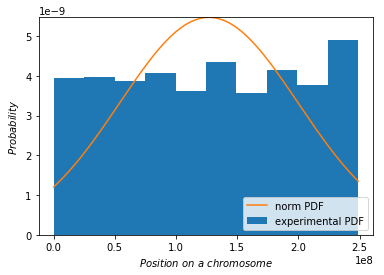

In [5]:
import random
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
#the function has two arguments: n is a number of regions, chrom is a string containing a chromosome name
def plotDistribution(n,chrom):
    chrLen = dimension_dict[chrom]
    position = []
    for i in range(n):
        position.append(random.randint(1,chrLen))
    position.sort()
    #mean value of n positions obtained randomly
    pmean = np.mean(position)
    #standard deviation
    pstd = np.std(position)
    #pdf = 'probability density function'
    pdf = stats.norm.pdf(position, pmean, pstd)
    plt.hist(position,normed=True, label = 'experimental PDF')
    plt.plot(position, pdf, label = 'norm PDF')
    plt.xlabel("$Position\ on\ a\ chromosome$")
    plt.ylabel("$Probability$")
    plt.legend(loc='lower right')
    plt.show()
#use the function to sample 1000 positions on chr1
plotDistribution(1000,'chr1')
    

As expected the distribution looks quite uniform: the histogram bins are approximately of the same height, so it is true that each position on a chromosome has the same probability to be chosen by a random.randint() function. Different from this is a PDF of a normal distribution shown in orange here. There is an important difference between these two: in case of a normal distribution ~68% of all values lie within one standard deviation σ away from the mean, hence the bell-shaped curve, the uniform distribution has a square-like form and no range is prefered for the data to be chosen from.
  
The PDF in general doesn't show the probability of each single position to be chosen, but it shows how probable it is that a random value falls within a particular range of values (interval). This probability is given by the integral of this variable’s PDF over that range. The integral over the whole range of possible values is set to 1 meaning 100% probability, in this case it is called *normed*.  
  
If we increase the number of draws tenfold (n=10000), the distribution gets even more uniform. The higher the n-value we choose the more uniform gets the distribution.

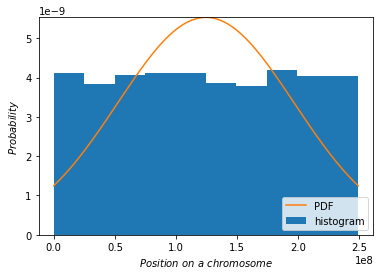

In [20]:
plotDistribution(10000,'chr1')

Now let's write a script with the new functions and import it as a module using the "import" statement. Then we'll be able to use those functions outside of the script.

In [6]:
%%writefile ../scripts/modelZeroModules.py
"""NCT Heidelberg
Elvira Mingazova 2017
Here are useful functions for completing week2 tasks"""

#a function which will process the given text file and return {"chr name": chr length} pairs inside of a dictionary
def getDimensionDict(filename):
    d={}
    with open(filename) as dimension_file:
        for line in dimension_file:
            key, value = line.split()
            d[key.strip()]=int(value.strip())
        dimension_file.close()
    return d
import random
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
#a new parameter "filename" was added to this function in order 
#to be able to call getDimensionDict(filename) from within
def plotDistribution(n,chrom,filename):
    dimension_dict = getDimensionDict(filename)
    chrLen = dimension_dict[chrom]
    position = []
    for i in range(n):
        position.append(random.randint(1,chrLen))
    position.sort()
    pmean = np.mean(position)
    pstd = np.std(position)
    pdf = stats.norm.pdf(position, pmean, pstd)
    plt.hist(position,normed=True, label = 'experimental PDF')
    plt.plot(position, pdf, label = 'norm PDF')
    plt.xlabel("$Position\ on\ a\ chromosome$")
    plt.ylabel("$Probability$")
    plt.legend(loc='lower right')
    plt.show()

Overwriting ../scripts/modelZeroModules.py


In order to be able to import a program as a module from a non-working directory we need to add the path to the PYTHONPATH. One way to do it at a runtime would be the following:

In [7]:
import sys
sys.path.insert(0, '/Users/elming/Advanced-random-IR/scripts')

In [8]:
import modelZeroModules as mzm

In [9]:
help(mzm)

Help on module modelZeroModules:

NAME
    modelZeroModules

FILE
    /Users/elming/Advanced-random-IR/scripts/modelZeroModules.py

DESCRIPTION
    NCT Heidelberg
    Elvira Mingazova 2017
    Here are useful functions for completing week2 tasks

FUNCTIONS
    getDimensionDict(filename)
        #a function which will process the given text file and return {"chr name": chr length} pairs inside of a dictionary
    
    plotDistribution(n, chrom, filename)
        #a new parameter "filename" was added to this function in order 
        #to be able to call getDimensionDict(filename) from within




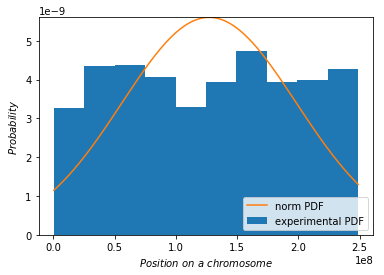

In [10]:
mzm.plotDistribution(1000,'chr1','../data/hg38.txt')